In [1]:
import sys
import os
home=os.getcwd()
sys.path.append(home+'/Functions')
from ChargeDataSet import *
from ShowDF import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DataSetName='12111.mzML'

In [3]:
DataSet=ChargeDataSet(DataSetName)

In [4]:
dataSet=DataSet[0]

In [58]:
len(Spectrum)

270

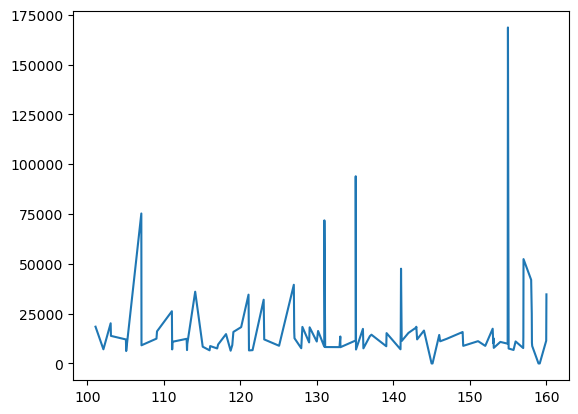

In [59]:
plt.plot(Spectrum[:100,0],Spectrum[:100,1])

In [ ]:
import numpy as np
import gc
def ModulesDetMax(MaxID,AdjacencyMatrix,VisitVector,Module=[],deep=0,MaxDeep=3):
#This is function also check for neightboors, but not more than 'MaxDeep', which is not a problem, as this function is just a first step in the clustering    
    CurrentModule=AdjacencyMatrix[MaxID]
    VisitVector[MaxID]=VisitVector[MaxID]+1
    if len(CurrentModule)>1:    
        VisitVector[CurrentModule]=VisitVector[CurrentModule]+1
        for KernelID in CurrentModule:
            Module.append(KernelID)
            if deep<MaxDeep and VisitVector[KernelID]<2:                
                Module=ModulesDetMax(MaxID=KernelID,AdjacencyMatrix=AdjacencyMatrix,VisitVector=VisitVector,deep=deep+1,MaxDeep=MaxDeep,Module=Module)        
    del CurrentModule
    del deep
    gc.collect()
    return Module

In [ ]:
import numpy as np
from ModulesDetMax import *
import gc
def MaxIntCentroids(Spectrum,AdjacencyMatrix,KernelIDs=[],features=0,FeaturesNumber=500,MinSignals=3,MinIntKernel=3e4,MaxDeep=3):        
    MaxInt=MinIntKernel*1.5
    VisitVector=np.zeros(len(AdjacencyMatrix))
    while features<FeaturesNumber and MaxInt>MinIntKernel:
        MaxInt=np.max(Spectrum[:,1])
        Loc=np.where(Spectrum[:,1]==MaxInt)[0][0]
        Module=ModulesDetMax(MaxID=Loc,AdjacencyMatrix=AdjacencyMatrix,VisitVector=VisitVector,Module=[Loc],MaxDeep=MaxDeep)       
        del Loc
        CleanModule=list(set(Module))
        if len(CleanModule)>MinSignals:
            KernelIDs.append(CleanModule)
            features+=1
        Spectrum[Module,1]=0
        del Module
        gc.collect()
    del MaxInt     
    gc.collect()
    if features==FeaturesNumber:
        print('There are more features')
    return KernelIDs

In [5]:
from SpectraCentroids import *
spectra=np.array(dataSet.get_peaks()).T
#Add an intensity Filter, mz range and RT range...

In [6]:
Centroids=SpectraCentroids(spectra.copy(),MinIntKernel=3e5,SafetyFactor=4,FractionCut=0.1353)




In [7]:
Centroids

array([[513.34443883, 524.93208261],
       [158.82688005, 159.19928573],
       [445.0893973 , 445.15011345],
       [172.92106615, 173.06359485],
       [144.75397031, 145.24096575]])